In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
import cvxopt as opt  
from scipy.optimize import minimize
from math import sqrt

In [2]:
data_table = pd.read_csv('Yield_Matrix.csv', index_col=0)
num_bonds = 22


In [3]:
trans_prob = np.matrix(data_table.iloc[:,:num_bonds])
r = data_table['Yield Possible'].values
e_r = np.squeeze(np.array(trans_prob.dot(r)))

In [4]:
N = 100000
w_all = np.matrix(np.zeros([N, num_bonds]))

#for i in range(num_bonds-1):
#    w_all[:, i] = np.matrix(np.random.rand(0, 1, N)).T
#w_all[:, num_bonds-1] = 1 - w_all.sum(axis=1)

In [5]:
def calc_cov(p_i_1, p_i_2, p_j_1, p_j_2, r1, r2, e_r1, e_r2):
    v = p_i_1*p_j_1*(r1**2)\
        +p_i_2*p_j_1*(r2)*(r1)\
        +p_i_1*p_j_2*(r1)*(r2)\
        +p_i_2*p_j_2*(r2**2)\
        -e_r1*e_r2
    return v

In [6]:
var_cov = np.matrix(np.zeros([num_bonds, num_bonds]))
for i in range(num_bonds):
    for j in range(i, num_bonds):
        p_i = trans_prob[i, i]/(trans_prob[i, i] + trans_prob[i, j])
        p_j = trans_prob[j, i]/(trans_prob[j, i] + trans_prob[j, j])
#        var_cov[i, j] = calc_cov(trans_prob[i, i], trans_prob[i, j], trans_prob[j, i], trans_prob[j,j], 
#                                r[i], r[j], e_r[i], e_r[j])
        var_cov[i, j] = calc_cov(p_i, 1-p_i, p_j, 1-p_j, 
                                r[i], r[j], e_r[i], e_r[j])
        var_cov[j, i] = var_cov[i, j]

In [7]:
r_all = np.zeros(N)
std_all=np.zeros(N)

In [8]:
for i in range(N):
    w = np.random.random(num_bonds)
    w /= np.sum(w)

    r_all[i] = w.dot(e_r)
    std_all[i] = sqrt(w.dot(var_cov).dot(w.T))
    

Text(0, 0.5, 'return')

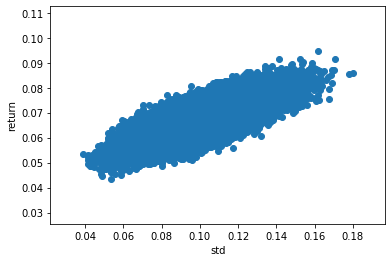

In [9]:
# Investment Universe
plt.scatter(std_all, r_all)
plt.xlabel('std')
plt.ylabel('return')

In [10]:
def calc_w(w, e_r, cov):
    r_w = w.dot(e_r)
    std_w = sqrt(w.dot(cov).dot(w.T))

    
    sharpe_ratio = r_w / std_w
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
              {'type': 'eq', 'fun': lambda x: x.dot(e_r) - 0.0598})

def optimize_w(e_r, cov, num_bonds):
    res = minimize(lambda x:calc_w(w, e_r, cov), w, method='Nelder-Mead', constraints=constraints, tol=1e-8)
    print (res)

optimize_w(e_r, var_cov, num_bonds)

 final_simplex: (array([[0.03314381, 0.02446048, 0.06617433, 0.01268752, 0.00250077,
        0.03678679, 0.03274391, 0.07849253, 0.08308504, 0.07620311,
        0.00846777, 0.073641  , 0.04912764, 0.06188877, 0.08796816,
        0.0123287 , 0.00857703, 0.06497895, 0.06293204, 0.00868569,
        0.07701741, 0.03810853],
       [0.03314381, 0.02446048, 0.06617433, 0.01268752, 0.00250077,
        0.03678679, 0.03274391, 0.07849253, 0.08308504, 0.07620311,
        0.00846777, 0.073641  , 0.04912764, 0.06188877, 0.08796816,
        0.0123287 , 0.00857703, 0.06497895, 0.06293204, 0.00868569,
        0.07701741, 0.03810853],
       [0.03314381, 0.02446048, 0.06617433, 0.01268752, 0.00250077,
        0.03678679, 0.03274391, 0.07849253, 0.08308504, 0.07620311,
        0.00846777, 0.073641  , 0.04912764, 0.06188877, 0.08796816,
        0.0123287 , 0.00857703, 0.06497895, 0.06293204, 0.00868569,
        0.07701741, 0.03810853],
       [0.03314381, 0.02446048, 0.06617434, 0.01268752, 0.00250077,


/Users/xinhui/anaconda3/lib/python3.7/site-packages/scipy/optimize/_minimize.py:516: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


In [11]:
def calc_w(w, e_r, cov):
    r_w = w.dot(e_r)
    std_w = sqrt(w.dot(cov).dot(w.T))

    
    sharpe_ratio = r_w / std_w
    return -sharpe_ratio

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

def optimize_w(e_r, cov, num_bonds):
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0, 0.08)
    bounds = tuple(bound for asset in range(num_bonds))
    res = minimize(lambda x:calc_w(w, e_r, cov), w, method='SLSQP', constraints= constraints,
                   bounds=bounds, tol=1e-8)
    print (res)

optimize_w(e_r, var_cov, num_bonds)

     fun: -0.6790391901450701
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.03369647, 0.02501314, 0.06672699, 0.01324019, 0.00305343,
       0.03733945, 0.03329657, 0.07904519, 0.08      , 0.07675577,
       0.00902043, 0.07419366, 0.0496803 , 0.06244143, 0.08      ,
       0.01288136, 0.00912969, 0.06553161, 0.0634847 , 0.00923835,
       0.07757007, 0.03866119])
